In [1]:
# necessery libraries
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load the scraped data
df = pd.read_csv("jumia_products.csv")

In [5]:
# Convert prices to numeric values
def clean_price(price):
    """Remove currency symbols and convert price to float."""
    return float(price.replace("₦", "").replace(",", "").strip())

df["Price"] = df["Price"].apply(clean_price)

# Basic Analysis
print("\n--- Price Statistics ---")
print(f"Total Products: {len(df)}")
print(f"Average Price: ₦{df['Price'].mean():,.2f}")
print(f"Minimum Price: ₦{df['Price'].min():,.2f}")
print(f"Maximum Price: ₦{df['Price'].max():,.2f}")


--- Price Statistics ---
Total Products: 40
Average Price: ₦259,197.75
Minimum Price: ₦9,500.00
Maximum Price: ₦755,000.00


In [6]:
# Most Expensive Products
print("Top 5 Most Expensive Products")
top_expensive = df.nlargest(5, "Price")
print(top_expensive[["Product Name", "Price", "Link"]])

Top 5 Most Expensive Products
                                         Product Name     Price  \
24  Hp EliteBook 840 G5 TOUCHSCREEN Core I7-16GB R...  755000.0   
26  Hp EliteBook 840 G5 Intel Core I7-32GB RAM/1TB...  750000.0   
9   Hp EliteBook 840 G6 Intel Core I5 Touchscreen ...  570700.0   
35  Hp EliteBook 840 G6 Intel Core I5-16GB RAM/1TB...  560000.0   
17  Hp EliteBook 840 G6 TOUCHSCREEN Intel Core I5-...  530000.0   

                                                 Link  
24  https://www.jumia.com.ng/hp-elitebook-840-g5-t...  
26  https://www.jumia.com.ng/hp-elitebook-840-g5-i...  
9   https://www.jumia.com.ng/hp-elitebook-840-g6-i...  
35  https://www.jumia.com.ng/hp-elitebook-840-g6-i...  
17  https://www.jumia.com.ng/elitebook-840-g6-touc...  


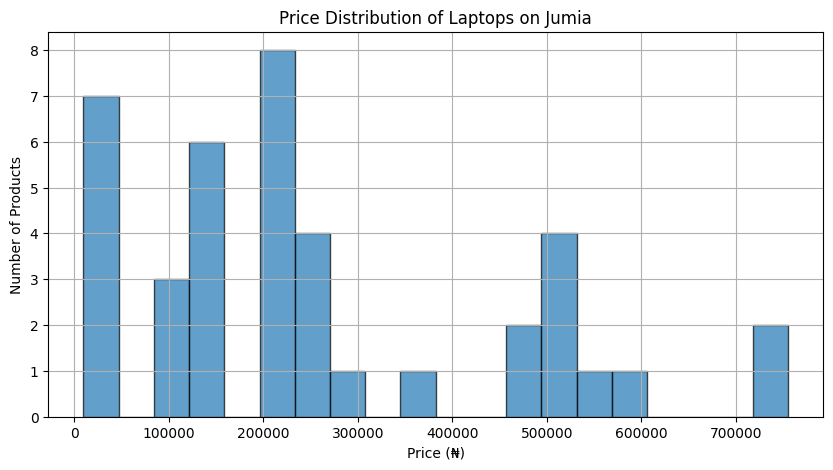

In [7]:
# Plot Price Distribution
plt.figure(figsize=(10, 5))
plt.hist(df["Price"], bins=20, edgecolor="black", alpha=0.7)
plt.xlabel("Price (₦)")
plt.ylabel("Number of Products")
plt.title("Price Distribution of Laptops on Jumia")
plt.grid(True)
plt.show()

In [8]:
# Define price ranges
bins = [0, 100000, 200000, 300000, 400000, 500000, float('inf')]
labels = ["Under ₦100,000", "₦100,000–₦200,000", "₦200,000–₦300,000", "₦300,000–₦400,000", "₦400,000–₦500,000", "Over ₦500,000"]

# Add a new column for price ranges
df["Price Range"] = pd.cut(df["Price"], bins=bins, labels=labels)

# Count the number of products in each price range
price_range_counts = df["Price Range"].value_counts().sort_index()

# Display the price range distribution
print(price_range_counts)

Price Range
Under ₦100,000        7
₦100,000–₦200,000    10
₦200,000–₦300,000    12
₦300,000–₦400,000     1
₦400,000–₦500,000     2
Over ₦500,000         8
Name: count, dtype: int64


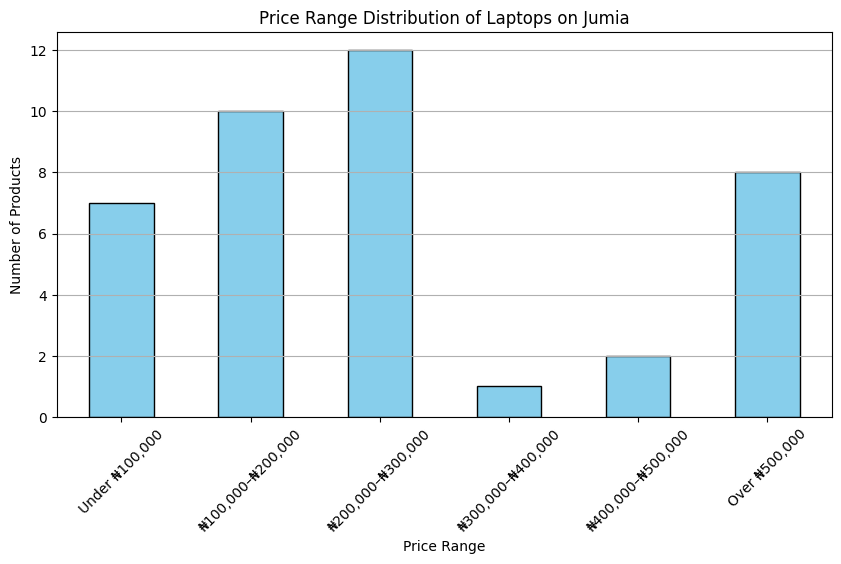

In [9]:
# Plot the price range distribution
plt.figure(figsize=(10, 5))
price_range_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Price Range Distribution of Laptops on Jumia")
plt.xlabel("Price Range")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()